# Detecting Fraudulent ATM transactions project

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv("instance_scores.csv")
lambdawts = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test_data = pd.read_csv("test_share.csv")
train_data = pd.read_csv('train.csv')

In [3]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(test_data.shape)
print()
print(train_data.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


In [4]:
print(geo.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(instance.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(lambdawts.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(qset.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(test_data.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (to

In [5]:
print(geo.nunique())
print("*********************************")
print(instance.nunique())
print("*********************************")
print(lambdawts.nunique())
print("*********************************")
print(qset.nunique())
print("*********************************")
print("Test_data[Group]:",test_data['Group'].nunique())
print("*********************************")
print("Train_data[Group]:",train_data['Group'].nunique())

id           284807
geo_score     25523
dtype: int64
*********************************
id                 284807
instance_scores     11158
dtype: int64
*********************************
Group        1400
lambda_wt    1400
dtype: int64
*********************************
id                      284807
qsets_normalized_tat     24832
dtype: int64
*********************************
Test_data[Group]: 915
*********************************
Train_data[Group]: 1301


In [6]:
train_data['from']='train'
test_data['from']="test"

In [7]:
Total_data=pd.concat([train_data,test_data],axis=0)

In [8]:
Total_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,from
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [9]:
Total_data['from'].value_counts()

from
train    227845
test      56962
Name: count, dtype: int64

In [10]:
Total_data['Group'].nunique()

1400

In [11]:
print(geo.isnull().sum())
print("*****************************")
print(instance.isnull().sum())
print("*****************************")
print(lambdawts.isnull().sum())
print("*****************************")
print(qset.isnull().sum())
print("*****************************")
print(Total_data.isnull().sum())

id               0
geo_score    71543
dtype: int64
*****************************
id                 0
instance_scores    0
dtype: int64
*****************************
Group        0
lambda_wt    0
dtype: int64
*****************************
id                           0
qsets_normalized_tat    103201
dtype: int64
*****************************
id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target  

In [12]:
print(geo.describe())
print("###########################")
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
###########################
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


<Axes: >

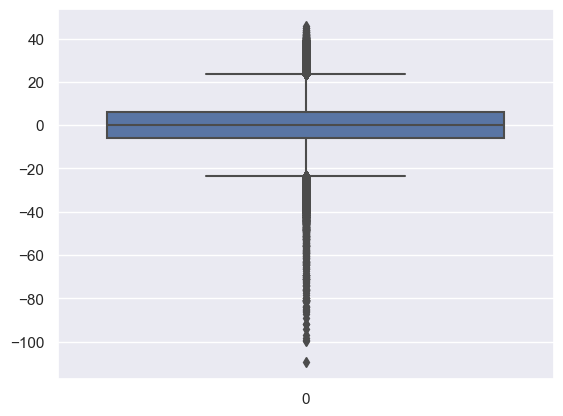

In [13]:
sns.boxplot(geo['geo_score'])

0.18

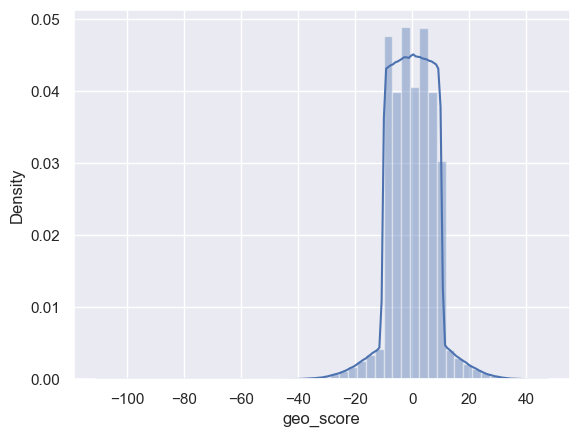

In [14]:
sns.distplot(geo['geo_score'])
geo['geo_score'].median()

<Axes: >

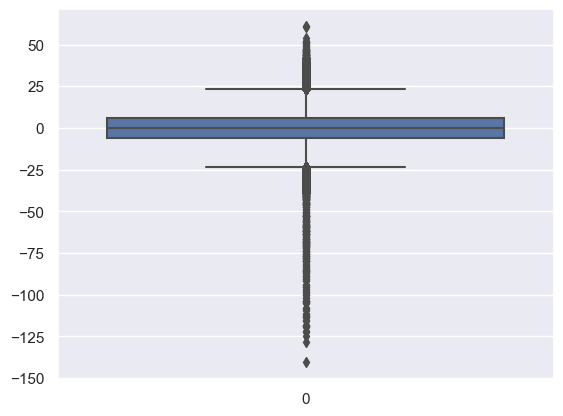

In [15]:
sns.boxplot(qset['qsets_normalized_tat'])

0.0199999999999997

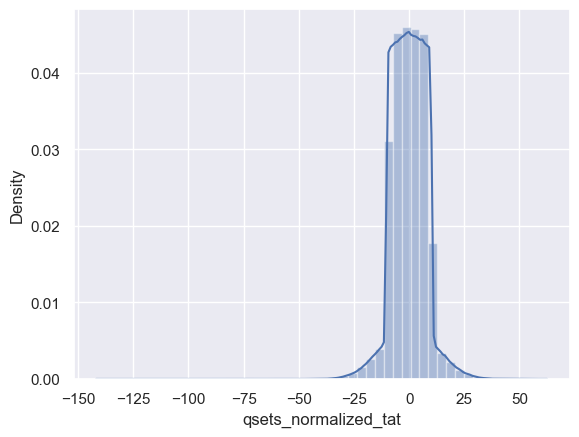

In [16]:
sns.distplot(qset['qsets_normalized_tat']) 
qset['qsets_normalized_tat'].median()

In [17]:
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [18]:
print(geo['geo_score'].isna().sum())
print(qset['qsets_normalized_tat'].isna().sum())

0
0


In [19]:
print(geo.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(instance.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(lambdawts.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(qset.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(test_data.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(train_data.columns)

Index(['id', 'geo_score'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['id', 'instance_scores'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['Group', 'lambda_wt'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['id', 'qsets_normalized_tat'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'from'],
      dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&

In [20]:
print(geo['id'].nunique())
print(geo['id'].count())
print(geo[geo['id']==1])

284807
1424035
         id  geo_score
52266     1       3.79
1140856   1       0.18
1163171   1      -1.72
1266260   1      -6.72
1422560   1      10.00


In [21]:
geo = geo.groupby('id').mean()

In [22]:
geo.shape

(284807, 1)

In [23]:
qset = qset.groupby('id').mean()

In [24]:
qset.shape

(284807, 1)

In [25]:
instance.shape

(1424035, 2)

In [26]:
instance['id'].nunique()

284807

In [27]:
instance=instance.groupby('id').mean()

In [28]:
instance.shape

(284807, 1)

In [29]:
lambdawts.shape

(1400, 2)

In [30]:
Total_data=pd.merge(Total_data , geo, on='id', how='left')

In [31]:
Total_data.head(5)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,from,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [32]:
instance.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [33]:
Total_data=pd.merge(Total_data , instance, on='id', how='left')

In [34]:
Total_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,from,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47


In [35]:
print(qset.head())
qset.shape

    qsets_normalized_tat
id                      
0                  0.214
1                 -0.110
2                  1.110
3                 -0.676
4                 -0.240


(284807, 1)

In [36]:
Total_data=pd.merge(Total_data , qset, on='id', how='left')

In [37]:
print(Total_data['Group'].shape)
print(Total_data['Group'].nunique())
Total_data['Group'].head()

(284807,)
1400


0    Grp169
1    Grp161
2    Grp261
3    Grp198
4    Grp228
Name: Group, dtype: object

In [38]:
lambdawts['Group'].nunique()

1400

In [39]:
Total_data=pd.merge(Total_data , lambdawts, on='Group', how='left')

In [40]:
Total_data['lambda_wt'].nunique()

1400

In [41]:
Total_data['lambda_wt'].count()

284807

In [42]:
Total_data.isna().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
from                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

# EDA- Exploratory Data Analysis

In [43]:
Train_data=Total_data[Total_data['from']=='train']

In [44]:
Test_data=Total_data[Total_data['from']=='test']

In [45]:
Train_data.drop(['id','from',"Group"],axis=1,inplace=True)

In [46]:
Train_data

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,0.850,-0.47,-0.630,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,0.356667,0.530000,...,0.646667,0.533333,0.680000,0.693333,-246.5025,0.0,-0.140,-0.44,-0.546,0.75
227841,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,0.806667,0.436667,...,0.596667,0.730000,0.646667,0.656667,-249.7775,0.0,0.426,-0.40,0.384,-0.98
227842,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,0.630000,0.870000,...,0.700000,0.696667,0.663333,0.673333,-249.7775,0.0,1.066,-0.13,0.010,0.15
227843,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,1.020000,0.413333,...,0.906667,0.540000,0.766667,0.710000,-242.7500,0.0,-3.290,-0.66,0.384,1.53


In [48]:
Test_data.drop(['id','from','Group','Target'],axis=1,inplace=True)

In [49]:
Test_data

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.250,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.430,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.320,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.110,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.110,-0.37,-0.130,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,0.543333,0.586667,...,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,-0.114,-0.51,0.010,-0.40
284803,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,1.023333,0.293333,...,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,0.110,-0.46,0.064,-1.54
284804,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,0.420000,0.480000,...,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,-0.530,0.65,-0.020,0.29
284805,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,0.600000,0.500000,...,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,0.270,-0.92,0.610,-0.69


In [50]:
Train_data.isna().sum().any()

False

In [51]:
Test_data.isnull().sum().any()

False

## Correlation Matrix

<Axes: >

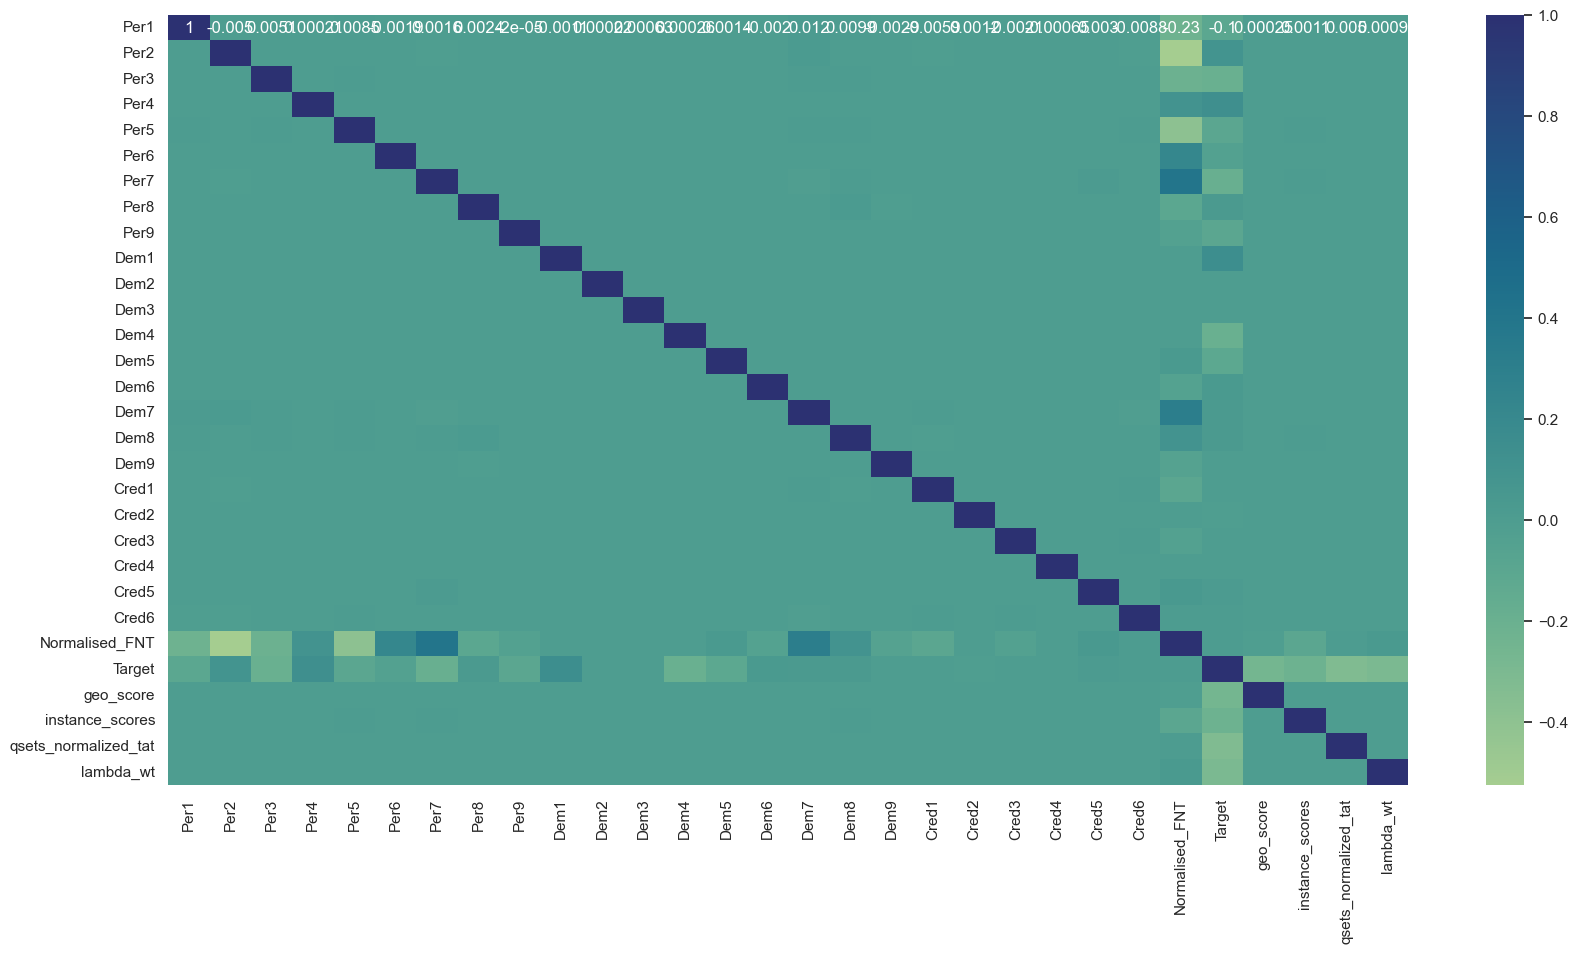

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(Train_data.corr(), annot=True, cmap="crest")

## Data splitting

In [53]:
y_train=Train_data['Target']

In [54]:
x_train=Train_data.drop('Target',axis=1)

In [55]:
x_train.head(5)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [56]:
y_train.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [57]:
print(x_train.shape)
y_train.shape

(227845, 29)


(227845,)

# Outlier Treatment

## Check Outlier

In [59]:
def check_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([.25, .75])
    IQR = Q3 -Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print('Min:', min(col), 'lower_IQR_limit:', lower_range,'|', 'Q1:', Q1,'|', '|', 'Q3:', Q3, 'upper_IQR_limit:', upper_range,"Max:", max(col))

In [60]:
for i in x_train.columns:
    print('***',i,'***')
    check_outlier(x_train[i])

*** Per1 ***
Min: -18.136666666666667 lower_IQR_limit: -0.755 | Q1: 0.36 | | Q3: 1.1033333333333333 upper_IQR_limit: 2.2183333333333333 Max: 1.4833333333333334
*** Per2 ***
Min: -23.57333333333333 lower_IQR_limit: -0.22499999999999987 | Q1: 0.47 | | Q3: 0.9333333333333332 upper_IQR_limit: 1.628333333333333 Max: 8.02
*** Per3 ***
Min: -15.443333333333332 lower_IQR_limit: -0.5900000000000003 | Q1: 0.3699999999999999 | | Q3: 1.01 upper_IQR_limit: 1.9700000000000002 Max: 3.793333333333333
*** Per4 ***
Min: -1.2266666666666666 lower_IQR_limit: -0.41166666666666685 | Q1: 0.3833333333333333 | | Q3: 0.9133333333333334 upper_IQR_limit: 1.7083333333333335 Max: 6.163333333333333
*** Per5 ***
Min: -37.24666666666666 lower_IQR_limit: -0.2133333333333332 | Q1: 0.4366666666666667 | | Q3: 0.87 upper_IQR_limit: 1.52 Max: 12.266666666666666
*** Per6 ***
Min: -8.053333333333333 lower_IQR_limit: -0.175 | Q1: 0.41 | | Q3: 0.7999999999999999 upper_IQR_limit: 1.3849999999999998 Max: 25.1
*** Per7 ***
Min: -1

## Capping outliers

In [61]:
def treat_outlier(x):
    # taking 5,25, 75,95
    q5 = np.percentile(x,5)
    q25 = np.percentile(x,25)
    q75 = np.percentile(x,75)
    q95 = np.percentile(x,95)
    # calculating IQR 
    IQR = q75 - q25
    # calculating minimum and max threshold value
    lower_bound = q25 - 1.5 * IQR
    upper_bound = q75 + 1.5 * IQR
    print(q5, q25, q75, q95, min(x), max(x))
    z=x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y :q5 if y < lower_bound else y )
    print('lower:', lower_bound,'|', 'Q1:', np.percentile(z,25),'|', '|', 'Q3:', np.percentile(z,75), 'upper:', upper_bound)
    return z

In [62]:
k=treat_outlier(Train_data['qsets_normalized_tat'])

-0.9800000000000001 -0.4800000000000001 0.4000000000000002 1.2740000000000005 -25.156 8.540000000000001
lower: -1.8000000000000007 | Q1: -0.4800000000000001 | | Q3: 0.4000000000000002 upper: 1.7200000000000006


In [63]:
print(check_outlier(k))
print(min(k),"|",max(k))
print(np.percentile(k,25),"|",np.percentile(k,95))

Min: -1.8000000000000003 lower_IQR_limit: -1.8000000000000007 | Q1: -0.4800000000000001 | | Q3: 0.4000000000000002 upper_IQR_limit: 1.7200000000000006 Max: 1.7200000000000006
None
-1.8000000000000003 | 1.7200000000000006
-0.4800000000000001 | 1.2740000000000005


In [64]:
for i in x_train:
    x_train[i] = treat_outlier(x_train[i])

-0.3 0.36 1.1033333333333333 1.36 -18.136666666666667 1.4833333333333334
lower: -0.755 | Q1: 0.36 | | Q3: 1.1033333333333333 upper: 2.2183333333333333
0.01 0.47 0.9333333333333332 1.27 -23.57333333333333 8.02
lower: -0.22499999999999987 | Q1: 0.47 | | Q3: 0.9333333333333332 upper: 1.628333333333333
-0.13 0.3699999999999999 1.01 1.3533333333333335 -15.443333333333332 3.793333333333333
lower: -0.5900000000000003 | Q1: 0.3699999999999999 | | Q3: 1.01 upper: 1.9700000000000002
-0.0633333333333333 0.3833333333333333 0.9133333333333334 1.5233333333333334 -1.2266666666666666 6.163333333333333
lower: -0.41166666666666685 | Q1: 0.3833333333333333 | | Q3: 0.9133333333333334 upper: 1.7083333333333335
0.1 0.4366666666666667 0.87 1.3666666666666665 -37.24666666666666 12.266666666666666
lower: -0.2133333333333332 | Q1: 0.4366666666666667 | | Q3: 0.87 upper: 1.52
0.1966666666666666 0.41 0.7999999999999999 1.72 -8.053333333333333 25.1
lower: -0.175 | Q1: 0.41 | | Q3: 0.7999999999999999 upper: 1.384999

In [65]:
Train_data.head(5)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,0.850,-0.47,-0.630,0.60


## Feature Importance

### Random Forest feature importance

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_label= RandomForestClassifier(n_estimators=100, random_state=10)
rf_label.fit(x_train,y_train)

fi_df2 = pd.DataFrame({
    'feature': x_train.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

In [67]:
fi_df2


,feature,rf_importance
27,qsets_normalized_tat,0.096694
6,Per7,0.075097
12,Dem4,0.073084
8,Per9,0.072675
25,geo_score,0.070138
26,instance_scores,0.069143
3,Per4,0.062792
9,Dem1,0.061893
28,lambda_wt,0.045492
2,Per3,0.038807


In [68]:
print(x_train.shape)
x_train.head(5)

(227845, 29)


,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.720000,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.526667,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.796667,0.753333,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [69]:
print(y_train.shape)
y_train.head(5)

(227845,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

# Model building

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=101)

In [71]:
print(X_train.shape)
print()
print(X_test.shape)
print()
print(Y_train.shape)
print()
print(Y_test.shape)
print()

(182276, 29)

(45569, 29)

(182276,)

(45569,)



## Logistic Regression

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [73]:
logit = LogisticRegression()
lr = logit.fit(X_train, Y_train)
Y_pred_train = logit.predict(X_train)
Y_pred_test = logit.predict(X_test)
# Confusion Matrix
print(confusion_matrix(Y_train, Y_pred_train))
print()
print(confusion_matrix(Y_test, Y_pred_test))
print()
print(classification_report(Y_train, Y_pred_train))
print()
print(classification_report(Y_test, Y_pred_test))
print()
print("Train Accuracy", accuracy_score(Y_train, Y_pred_train))
print()
print("Test Accuracy", accuracy_score(Y_test, Y_pred_test))

[[181905     40]
 [    77    254]]

[[45495    11]
 [   17    46]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181945
         1.0       0.86      0.77      0.81       331

    accuracy                           1.00    182276
   macro avg       0.93      0.88      0.91    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45506
         1.0       0.81      0.73      0.77        63

    accuracy                           1.00     45569
   macro avg       0.90      0.86      0.88     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9993581162632491

Test Accuracy 0.9993855471921701


In [74]:
Test_data_pred = logit.predict(Test_data)
Test_data_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
y_train.value_counts()

Target
0.0    227451
1.0       394
Name: count, dtype: int64

## Descision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dt = dtree.fit(X_train, Y_train)
Y_pred_train_dt = dtree.predict(X_train)
Y_pred_test_dt = dtree.predict(X_test)
# Confusion Matrix
print(confusion_matrix(Y_train, Y_pred_train_dt))
print()
print(confusion_matrix(Y_test, Y_pred_test_dt))
print()
# Classifiction_report
print(classification_report(Y_train, Y_pred_train_dt))
print()
print(classification_report(Y_test, Y_pred_test_dt))
print()
# Accuracy_score
print("Train Accuracy", accuracy_score(Y_train, Y_pred_train_dt))
print()
print("Test Accuracy", accuracy_score(Y_test, Y_pred_test_dt))

[[181945      0]
 [     0    331]]

[[45474    32]
 [   18    45]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181945
         1.0       1.00      1.00      1.00       331

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45506
         1.0       0.58      0.71      0.64        63

    accuracy                           1.00     45569
   macro avg       0.79      0.86      0.82     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9989027628431609


## Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier()
rf = randf.fit(X_train, Y_train)
Y_pred_train_rf = randf.predict(X_train)
Y_pred_test_rf = randf.predict(X_test)
# Confusion Matrix
print(confusion_matrix(Y_train, Y_pred_train_rf))
print()
print(confusion_matrix(Y_test, Y_pred_test_rf))
print()
# Classifiction_report
print(classification_report(Y_train, Y_pred_train_rf))
print()
print(classification_report(Y_test, Y_pred_test_rf))
print()
# Accuracy_score
print("Train Accuracy", accuracy_score(Y_train, Y_pred_train_rf))
print()
print("Test Accuracy", accuracy_score(Y_test, Y_pred_test_rf))

[[181945      0]
 [     1    330]]

[[45504     2]
 [   17    46]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181945
         1.0       1.00      1.00      1.00       331

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45506
         1.0       0.96      0.73      0.83        63

    accuracy                           1.00     45569
   macro avg       0.98      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9999945138142158

Test Accuracy 0.9995830498804011


## Support Vector Machine

In [78]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(X_train, Y_train)
Y_pred_train_svm = SVClass.predict(X_train)
Y_pred_test_svm = SVClass.predict(X_test)
# Confusion Matrix
print(confusion_matrix(Y_train, Y_pred_train_svm))
print()
print(confusion_matrix(Y_test, Y_pred_test_svm))
print()
# classification_report
print(classification_report(Y_train, Y_pred_train_svm))
print()
print(classification_report(Y_test, Y_pred_test_svm))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(Y_train, Y_pred_train_svm))
print()
print("Test Accuracy", accuracy_score(Y_test, Y_pred_test_svm))

[[181945      0]
 [   331      0]]

[[45506     0]
 [   63     0]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181945
         1.0       0.00      0.00      0.00       331

    accuracy                           1.00    182276
   macro avg       0.50      0.50      0.50    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45506
         1.0       0.00      0.00      0.00        63

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9981840725054313

Test Accuracy 0.9986174811823828


## XGBoost Classifier

In [81]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgb = xgboost.fit(X_train, Y_train)
Y_pred_train_xgb = xgboost.predict(X_train)
Y_pred_test_xgb = xgboost.predict(X_test)
# Confusion Matrix
print(confusion_matrix(Y_train, Y_pred_train_xgb))
print()
print(confusion_matrix(Y_test, Y_pred_test_xgb))
print()
# classification_report
print(classification_report(Y_train, Y_pred_train_xgb))
print()
print(classification_report(Y_test, Y_pred_test_xgb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(Y_train, Y_pred_train_xgb))
print()
print("Test Accuracy", accuracy_score(Y_test, Y_pred_test_xgb))

[[181945      0]
 [     0    331]]

[[45500     6]
 [   16    47]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181945
         1.0       1.00      1.00      1.00       331

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45506
         1.0       0.89      0.75      0.81        63

    accuracy                           1.00     45569
   macro avg       0.94      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9995172156509908


## Voting Classifier

In [82]:
from sklearn.ensemble import VotingClassifier

In [83]:
voting = VotingClassifier(estimators=[('logit', lr ),('dtree', dt),('rforest', rf),('xgboost', xgb),
                                     ("svm", svm)])
voting_evc = voting.fit(X_train, Y_train)
Y_pred_train_voting = voting.predict(X_train)
Y_pred_test_voting = voting.predict(X_test)
# Confusion Matrix
print(confusion_matrix(Y_train, Y_pred_train_voting))
print()
print(confusion_matrix(Y_test, Y_pred_test_voting))
print()
# classification_report
print(classification_report(Y_train, Y_pred_train_voting))
print()
print(classification_report(Y_test, Y_pred_test_voting))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(Y_train, Y_pred_train_voting))
print()
print("Test Accuracy", accuracy_score(Y_test, Y_pred_test_voting))

[[181945      0]
 [     0    331]]

[[45504     2]
 [   17    46]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181945
         1.0       1.00      1.00      1.00       331

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45506
         1.0       0.96      0.73      0.83        63

    accuracy                           1.00     45569
   macro avg       0.98      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9995830498804011


In [89]:
accuracy_logit = accuracy_score(Y_test, Y_pred_test)
accuracy_dtree = accuracy_score(Y_test, Y_pred_test_dt)
accuracy_rf = accuracy_score(Y_test, Y_pred_test_rf)
accuracy_xgb = accuracy_score(Y_test, Y_pred_test_xgb)
accuracy_svm = accuracy_score(Y_test, Y_pred_test_svm)
accuracy_voting = accuracy_score(Y_test, Y_pred_test_voting)

In [90]:
point1 = ["Logistic", 'Dtree','RForest','XGBoost','SVM','Voting']
point2 = [accuracy_logit,accuracy_dtree,accuracy_rf,accuracy_xgb,accuracy_svm,accuracy_voting]

final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

  Method Used  Accuracy
0    Logistic  0.999386
1       Dtree  0.998903
2     RForest  0.999583
3     XGBoost  0.999517
4         SVM  0.998617
5      Voting  0.999583


In [91]:
confusion_matrix(Y_train,Y_pred_train_rf)

array([[181945,      0],
       [     1,    330]], dtype=int64)

In [92]:
confusion_matrix(Y_test,Y_pred_test_rf)

array([[45504,     2],
       [   17,    46]], dtype=int64)

### Random Forest is the most accurate

## Predcition of the Test data

In [93]:
Final_data_predict=randf.predict(Test_data)
print(Final_data_predict)

[0. 0. 0. ... 0. 0. 0.]


In [94]:
Test_data_pred=pd.DataFrame(Final_data_predict)

In [95]:
Test_data_pred.value_counts()

0.0    56888
1.0       74
Name: count, dtype: int64

### There are 74 fraud occurence in a total 56962 transactions